Welcome to the Vector Space and Linear Transformation Program!
Enter vectors in 2D or 3D space as space-separated numbers (e.g., '1 2' or '1 2 3'). Enter 'done' to finish:

Checking linear independence...
The rank of the matrix is: 2
The vectors are linearly independent.

Visualizing the span of the vectors...


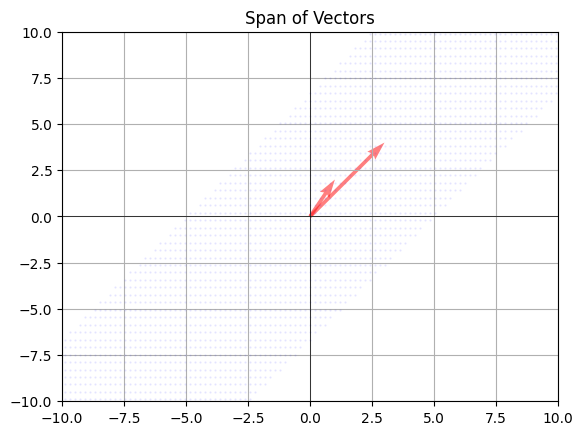


Finding the basis for the span...
Basis vectors:
[[-0.40455358  0.9145143 ]
 [-0.9145143  -0.40455358]]
Error: invalid syntax (<string>, line 0)
The vector cannot be represented as a linear combination of the given vectors.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def input_vectors():
    """Input vectors interactively as numbers separated by spaces."""
    print("Enter vectors in 2D or 3D space as space-separated numbers (e.g., '1 2' or '1 2 3'). Enter 'done' to finish:")
    vectors = []
    dim = None
    while True:
        inp = input(f"Vector {len(vectors) + 1}: ")
        if inp.lower() == "done":
            break
        try:
            vector = list(map(int, inp.split()))
            if dim is None:
                dim = len(vector)
            if len(vector) != dim:
                print(f"Please enter a vector of dimension {dim}.")
            else:
                vectors.append(vector)
        except ValueError:
            print("Invalid input. Please enter space-separated integers.")
    return np.array(vectors), dim

def check_independence(vectors):
    """Check linear dependence/independence."""
    if len(vectors) == 0:
        return
    print("\nChecking linear independence...")
    matrix = np.stack(vectors, axis=1)
    rank = np.linalg.matrix_rank(matrix)
    print(f"The rank of the matrix is: {rank}")
    if rank == len(vectors):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")

def compute_span(vectors):
    """Visualize the span of vectors in 2D."""
    if len(vectors) == 0 or len(vectors[0]) != 2:
        print("Span visualization is only available for 2D vectors.")
        return
    print("\nVisualizing the span of the vectors...")
    plt.figure()
    for vec in vectors:
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    # Generate the span
    x = np.linspace(-10, 10, 100)
    for combo in combinations(vectors, 2):
        a, b = combo
        for t1 in x:
            for t2 in x:
                point = t1 * a + t2 * b
                plt.plot(point[0], point[1], 'bo', markersize=0.5, alpha=0.1)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid()
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title("Span of Vectors")
    plt.show()

def find_basis(vectors):
    """Find a basis for the span."""
    if len(vectors) == 0:
        return
    print("\nFinding the basis for the span...")
    matrix = np.stack(vectors, axis=1)
    rank = np.linalg.matrix_rank(matrix)
    u, s, vh = np.linalg.svd(matrix)
    basis_vectors = vh[:rank].T
    print(f"Basis vectors:\n{basis_vectors}")
    return basis_vectors

def linear_combination(vectors):
    """Find coefficients to represent a given vector as a linear combination."""
    if len(vectors) == 0:
        return
    try:
        resultant_vector = np.array(eval(input("\nEnter the resultant vector to represent: ")), dtype=float)
        coefficients = np.linalg.lstsq(np.stack(vectors).T, resultant_vector, rcond=None)[0]
        print(f"Coefficients to represent the resultant vector:\n{coefficients}")
        print(f"Linear combination: ", 
              " + ".join([f"({coeff}) * {vec}" for coeff, vec in zip(coefficients, vectors)]))
    except Exception as e:
        print(f"Error: {e}\nThe vector cannot be represented as a linear combination of the given vectors.")

# Main program
if __name__ == "__main__":
    print("Welcome to the Vector Space and Linear Transformation Program!")
    vectors, dimension = input_vectors()
    if len(vectors) > 0:
        check_independence(vectors)
        if dimension == 2:
            compute_span(vectors)
        basis = find_basis(vectors)
        linear_combination(vectors)
    else:
        print("No vectors provided.")


Choose how to provide vectors:
1. Enter vectors manually
2. Generate random vectors
Enter vectors in 2D space as space-separated numbers (e.g., '1 2'). Enter 'done' to finish:

Checking linear independence...
The rank of the matrix is: 2
The vectors are linearly independent.


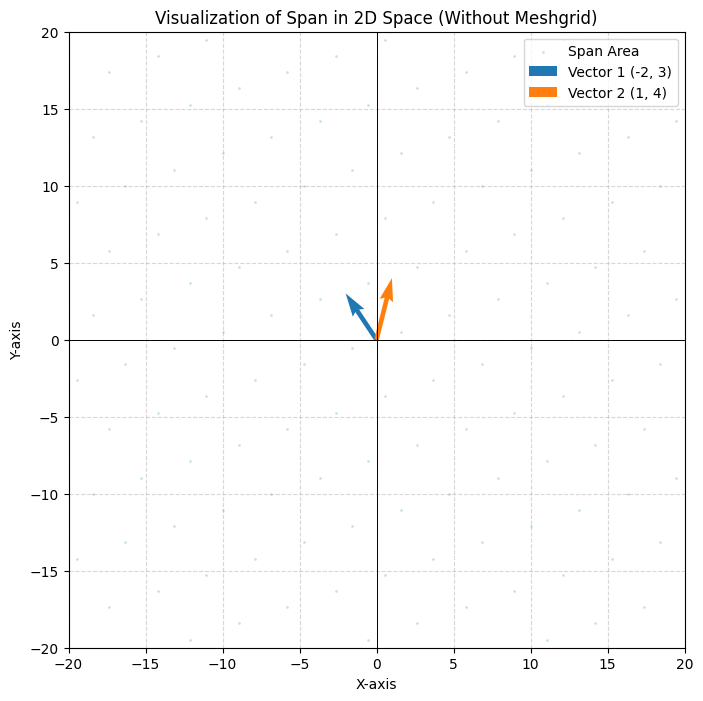


Finding the basis for the span...
Basis vectors:
[[-2  3]
 [ 1  4]]

Representing the vector as a linear combination...
The vector [-7. -6.] can be represented as:
2.00 * [-2  3] + -3.00 * [1 4]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def input_vectors():
    """Input vectors interactively or generate randomly."""
    print("Choose how to provide vectors:")
    print("1. Enter vectors manually")
    print("2. Generate random vectors")
    choice = input("Enter your choice (1/2): ")
    
    if choice == "1":
        print("Enter vectors in 2D space as space-separated numbers (e.g., '1 2'). Enter 'done' to finish:")
        vectors = []
        while len(vectors) < 2:
            inp = input(f"Vector {len(vectors) + 1}: ")
            if inp.lower() == "done" and len(vectors) == 2:
                break
            try:
                vector = list(map(int, inp.split()))
                if len(vector) != 2:
                    print("Please enter a valid 2D vector (two numbers).")
                else:
                    vectors.append(vector)
            except ValueError:
                print("Invalid input. Please enter space-separated integers.")
    elif choice == "2":
        # Generate random 2D vectors
        vectors = [np.random.randint(-10, 10, 2) for _ in range(2)]
        print(f"Generated vectors: {vectors}")
    else:
        print("Invalid choice. Exiting.")
        return None
    
    return np.array(vectors)

def check_independence(vectors):
    """Check linear dependence/independence."""
    print("\nChecking linear independence...")
    matrix = np.stack(vectors, axis=1)
    rank = np.linalg.matrix_rank(matrix)
    print(f"The rank of the matrix is: {rank}")
    if rank == len(vectors):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")

def visualize_span(vectors, scale=10, points_per_axis=20):
    """
    Visualize the span of two 2D vectors without using meshgrid.
    
    Parameters:
        vectors (list or np.ndarray): A list of two 2D vectors.
        scale (int): Range of scalar multiples for the span. Default is 10.
        points_per_axis (int): Number of scalar combinations to compute. Default is 100.
    """
    # Ensure the vectors are NumPy arrays
    vectors = [np.array(v) for v in vectors]
    
    # Validate that vectors are 2D
    if len(vectors[0]) != 2 or len(vectors[1]) != 2:
        print("This function only supports 2D vectors for visualization.")
        return

    # Generate scalar combinations
    scalars = np.linspace(-scale, scale, points_per_axis)
    span_points = []
    for s1 in scalars:
        for s2 in scalars:
            span_points.append(s1 * vectors[0] + s2 * vectors[1])
    span_points = np.array(span_points)

    # Plot the span
    plt.figure(figsize=(8, 8))
    plt.scatter(span_points[:, 0], span_points[:, 1], color='lightblue', s=1, alpha=0.6, label='Span Area')

    # Plot the vectors
    for i, vec in enumerate(vectors):
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
                   label=f"Vector {i+1} ({vec[0]}, {vec[1]})", color=f"C{i}")

    # Plot settings
    plt.axhline(0, color='black', linewidth=0.7)
    plt.axvline(0, color='black', linewidth=0.7)
    plt.xlim(-scale * 2, scale * 2)
    plt.ylim(-scale * 2, scale * 2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("Visualization of Span in 2D Space (Without Meshgrid)")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def find_basis(vectors):
    """Find a basis for the span without SVD."""
    print("\nFinding the basis for the span...")
    independent_vectors = []
    for i in range(len(vectors)):
        candidate_basis = independent_vectors + [vectors[i]]
        if np.linalg.matrix_rank(np.column_stack(candidate_basis)) > len(independent_vectors):
            independent_vectors.append(vectors[i])
    basis = np.array(independent_vectors)
    print(f"Basis vectors:\n{basis}")
    return basis

def represent_vector_as_linear_combination(vectors):
    """
    Represent the result_vector as a linear combination of the given vectors.
    Solve c1*v1 + c2*v2 + ... + cr*vr = result_vector.
    """
    print("\nRepresenting the vector as a linear combination...")
    
    # Convert vectors to a matrix
    matrix = np.column_stack(vectors)  # Stack vectors as columns of a matrix
    result_vector = np.array(list(map(int, input("Enter the resultant vector (space-separated numbers): ").split())), dtype=float)
    result_vector = result_vector.reshape(-1, 1)  # Ensure result_vector is 2D
    
    try:
        # Solve the linear system Ax = b
        coefficients = np.linalg.solve(matrix, result_vector)
        print(f"The vector {result_vector.flatten()} can be represented as:")
        print(" + ".join(
            f"{coefficients[i][0]:.2f} * {vectors[i]}" for i in range(len(vectors))
        ))
    except np.linalg.LinAlgError as e:
        print("The vector cannot be represented as a linear combination of the given vectors.")
        print(f"Reason: {e}")

if __name__ == "__main__":
    # Input vectors
    vectors = input_vectors()
    if vectors is None:
        exit()
    
    # Check linear independence
    check_independence(vectors)
    
    # Visualize the span of the vectors
    visualize_span(vectors)
    
    # Find the basis of the span
    find_basis(vectors)
    
    # Represent a result vector as a linear combination
    represent_vector_as_linear_combination(vectors)


Choose how to provide vectors:
1. Enter vectors manually
2. Generate random vectors
Enter vectors in 2D space as space-separated numbers (e.g., '1 2'). Enter 'done' to finish:

Checking linear independence...
The rank of the matrix is: 2
The vectors are linearly independent.


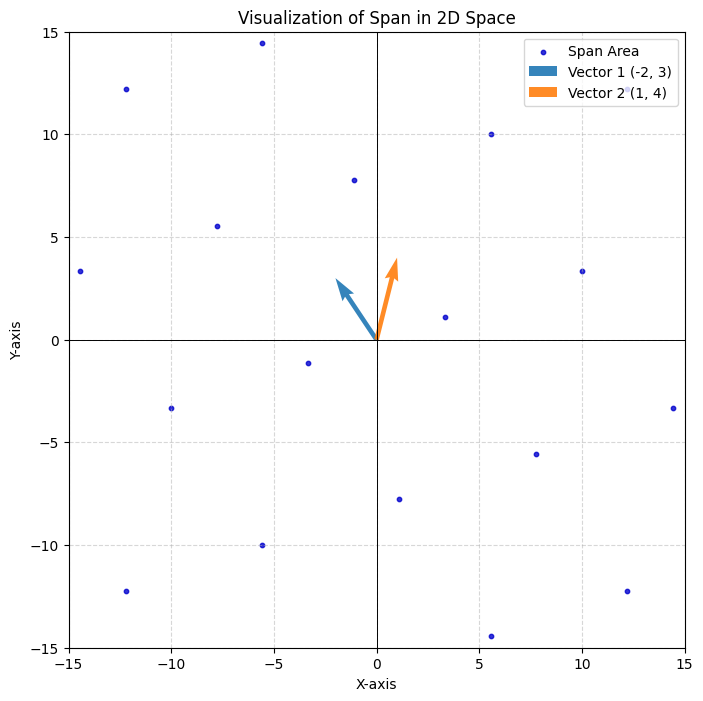


Finding the basis for the span...
Basis vectors:
[[-2  3]
 [ 1  4]]

Representing the vector as a linear combination...
The vector [-7. -6.] can be represented as:
2.00 * [-2  3] + -3.00 * [1 4]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def input_vectors():
    print("Choose how to provide vectors:")
    print("1. Enter vectors manually")
    print("2. Generate random vectors")
    choice = input("Enter your choice (1/2): ")

    if choice == "1":
        print("Enter vectors in 2D space as space-separated numbers (e.g., '1 2'). Enter 'done' to finish:")
        vectors = []
        while True:
            inp = input(f"Vector {len(vectors) + 1} (or 'done' to finish): ")
            if inp.lower() == "done":
                if len(vectors) >= 2:
                    break
                else:
                    print("Please enter at least two vectors.")
                    continue
            try:
                vector = list(map(int, inp.split()))
                if len(vector) != 2:
                    print("Please enter a valid 2D vector (two numbers).")
                else:
                    vectors.append(vector)
            except ValueError:
                print("Invalid input. Please enter space-separated integers.")
    elif choice == "2":
        num_vectors = int(input("How many random vectors do you want to generate? "))
        if num_vectors < 2:
            print("You must generate at least two vectors.")
            return None
        vectors = [np.random.randint(-10, 10, 2) for _ in range(num_vectors)]
        print(f"Generated vectors: {vectors}")
    else:
        print("Invalid choice. Exiting.")
        return None

    return np.array(vectors)

def check_independence(vectors):
    print("\nChecking linear independence...")
    matrix = np.stack(vectors, axis=1)
    rank = np.linalg.matrix_rank(matrix)
    print(f"The rank of the matrix is: {rank}")
    if rank == len(vectors[0]):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")

def visualize_span(vectors, scale=10, points_per_axis=10):
    if len(vectors) != 2:
        print("Visualization currently supports only 2 vectors.")
        return

    vectors = [np.array(v) for v in vectors]

    scalars = np.linspace(-scale, scale, points_per_axis)
    span_points = []
    for s1 in scalars:
        for s2 in scalars:
            span_points.append(s1 * vectors[0] + s2 * vectors[1])
    span_points = np.array(span_points)

    plt.figure(figsize=(8, 8))

    plt.scatter(span_points[:, 0], span_points[:, 1], color='mediumblue', s=10, alpha=0.8, marker='o', label='Span Area')

    for i, vec in enumerate(vectors):
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
                   label=f"Vector {i+1} ({vec[0]}, {vec[1]})", color=f"C{i}", linewidth=2, alpha=0.9)

    plt.axhline(0, color='black', linewidth=0.7)
    plt.axvline(0, color='black', linewidth=0.7)
    plt.xlim(-scale * 1.5, scale * 1.5)
    plt.ylim(-scale * 1.5, scale * 1.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("Visualization of Span in 2D Space")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def find_basis(vectors):
    print("\nFinding the basis for the span...")
    independent_vectors = []
    for i in range(len(vectors)):
        candidate_basis = independent_vectors + [vectors[i]]
        if np.linalg.matrix_rank(np.column_stack(candidate_basis)) > len(independent_vectors):
            independent_vectors.append(vectors[i])
    basis = np.array(independent_vectors)
    print(f"Basis vectors:\n{basis}")
    return basis

def represent_vector_as_linear_combination(vectors):
    print("\nRepresenting the vector as a linear combination...")
    
    matrix = np.column_stack(vectors)
    result_vector = np.array(list(map(int, input("Enter the resultant vector (space-separated numbers): ").split())), dtype=float)
    result_vector = result_vector.reshape(-1, 1)
    
    try:
        coefficients = np.linalg.solve(matrix, result_vector)
        print(f"The vector {result_vector.flatten()} can be represented as:")
        print(" + ".join(
            f"{coefficients[i][0]:.2f} * {vectors[i]}" for i in range(len(vectors))
        ))
    except np.linalg.LinAlgError as e:
        print("The vector cannot be represented as a linear combination of the given vectors.")
        print(f"Reason: {e}")


if __name__ == "__main__":
    # Input vectors
    vectors = input_vectors()
    if vectors is None:
        exit()

    # Check linear independence
    check_independence(vectors)

    # Visualize the span of the vectors
    visualize_span(vectors)

    # Find the basis of the span
    find_basis(vectors)

    # Represent a result vector as a linear combination
    represent_vector_as_linear_combination(vectors)
